In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import os

In [2]:
file = "model_source_comp"

model_list = [
    "TrAdaBoost",
    "XGBRegression",
    "RFRegression",
    #"LinearRegression_standard",
    #"BayesianOptimization",
]

es_list = [
    #"XGB", 
    "LGBM",
]
ne_list = [
    #1,
    #3,
    5,
    #10,
]
k_list = [
    #1, 
    #3,
    5,
    #15,
]
selection_order_list = [
    "top",
    #"bottom",
]
top_k_list = [
    1,
    #3,
    #5,
    #10,
]
epsilon_list = [
    0,
    #0.05,
    #0.1,
    ]
acquisition_type_list = [
    "EI",
    #"MPI",
    ]

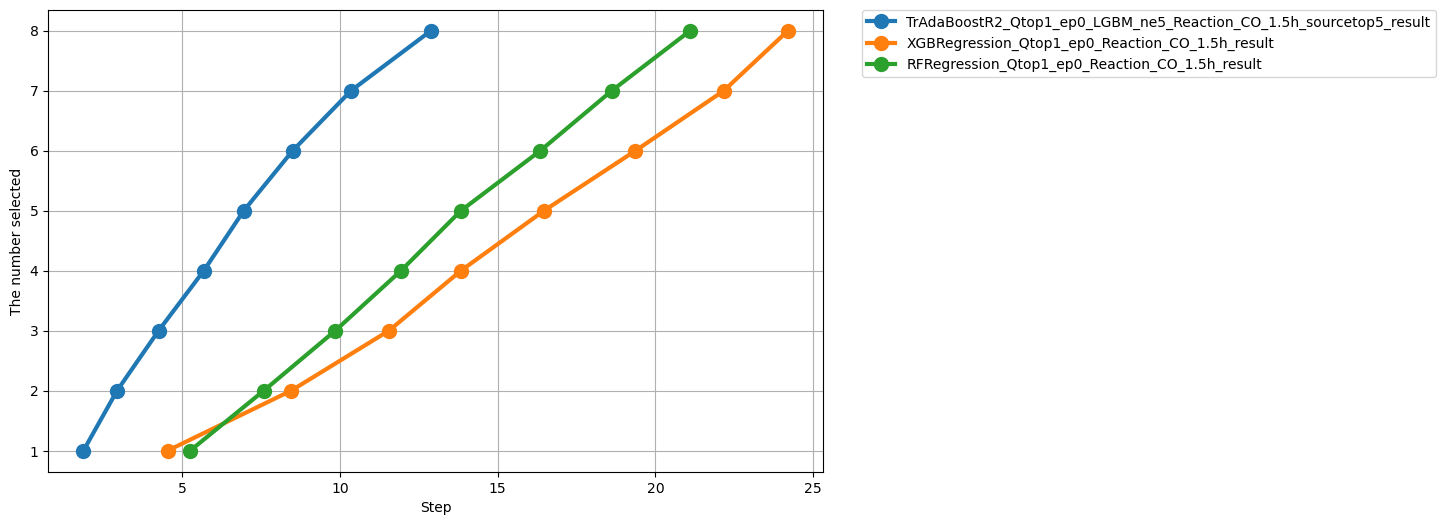

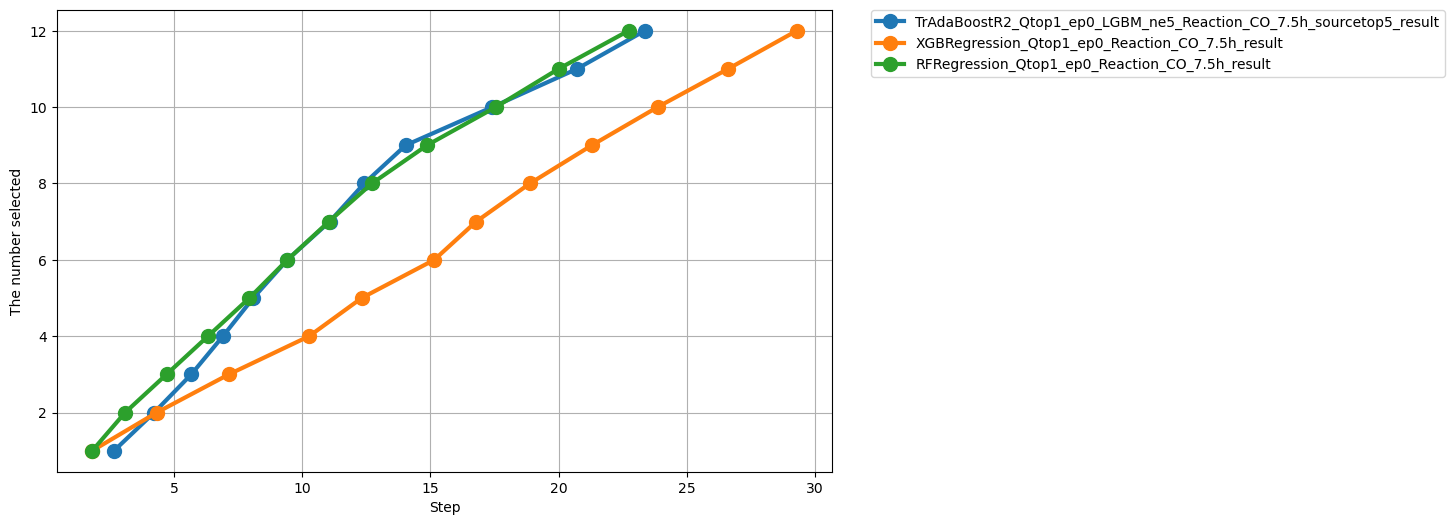

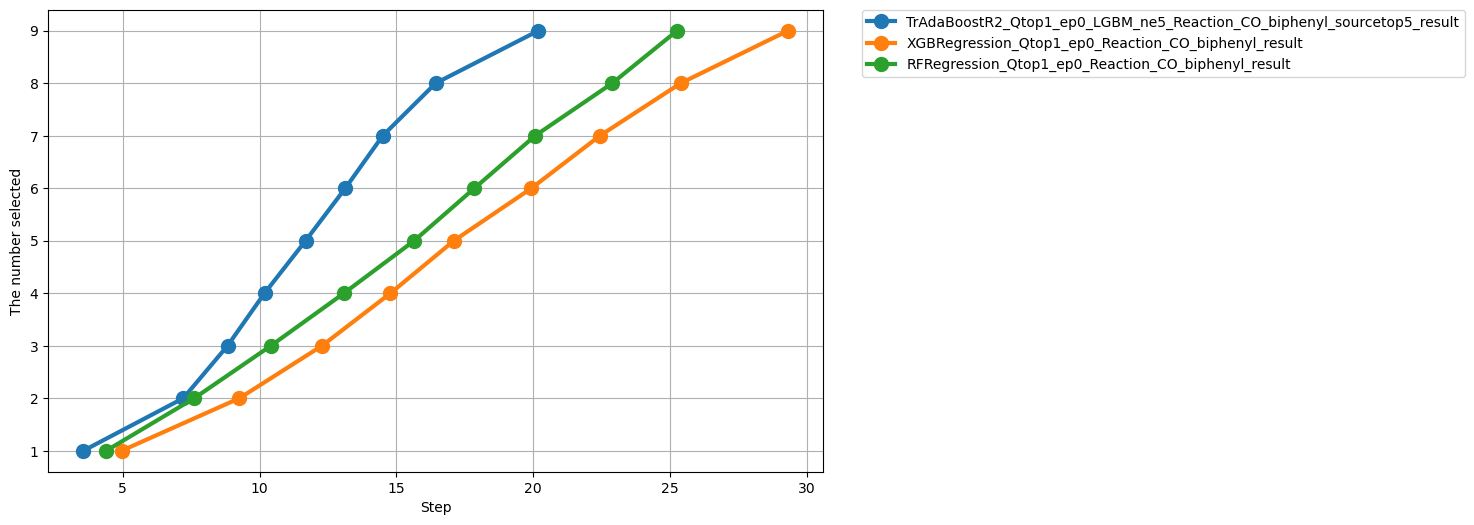

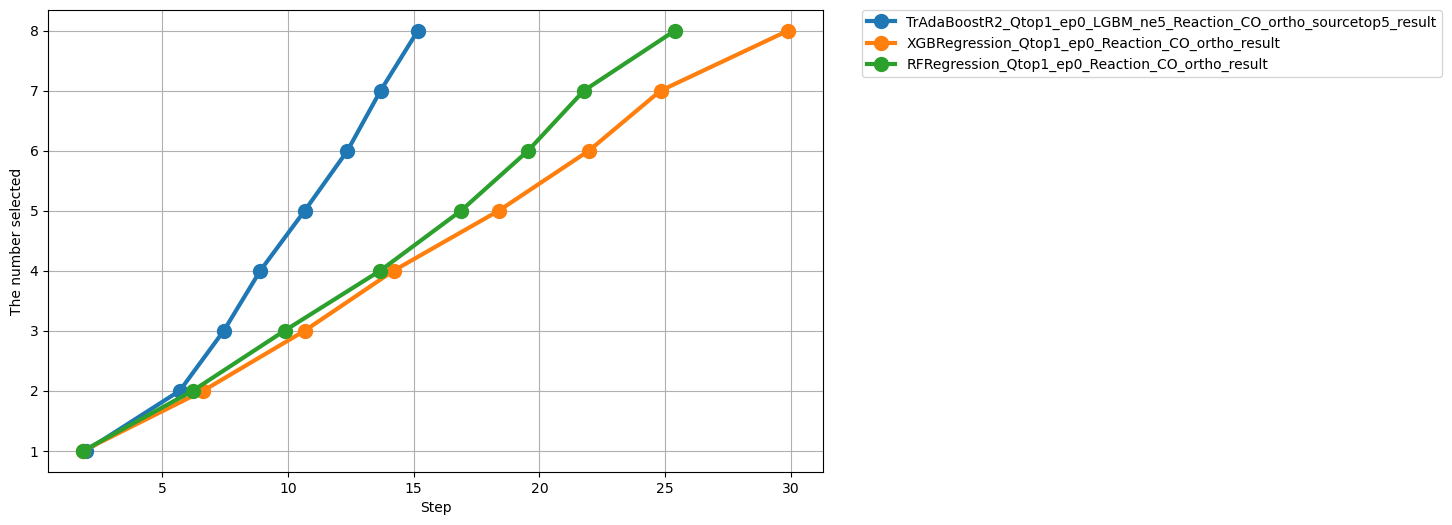

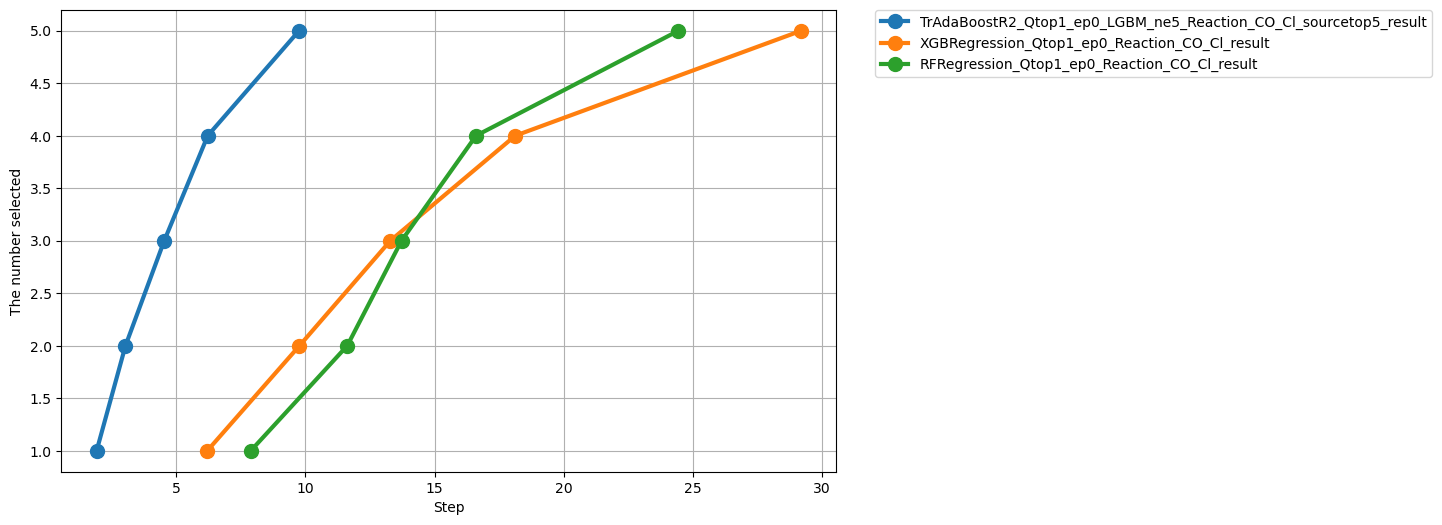

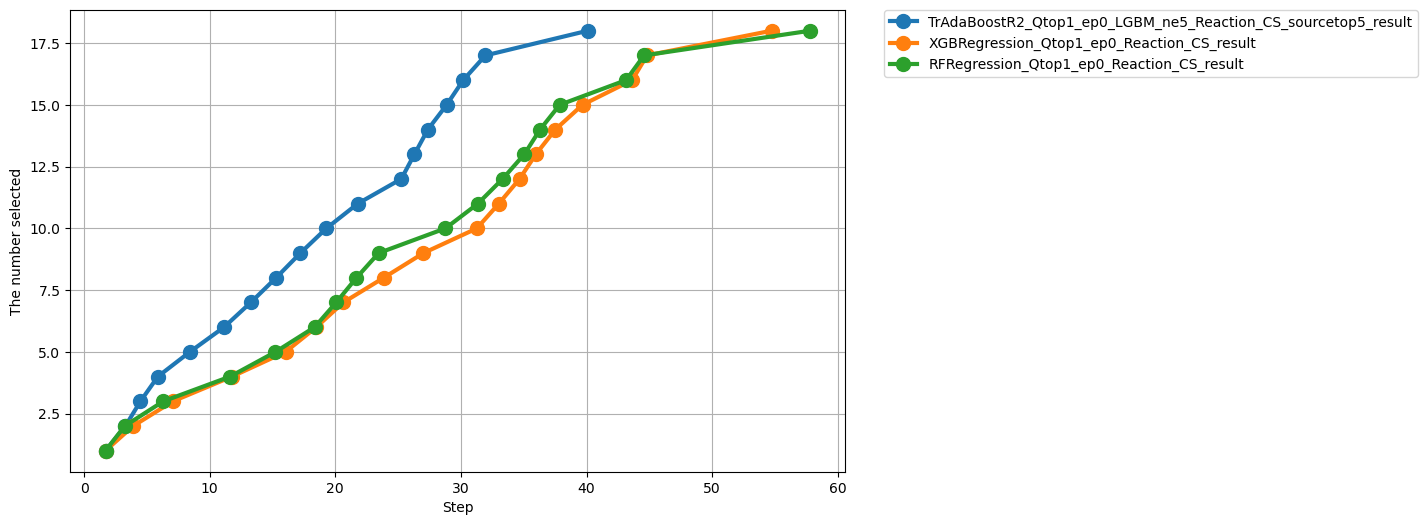

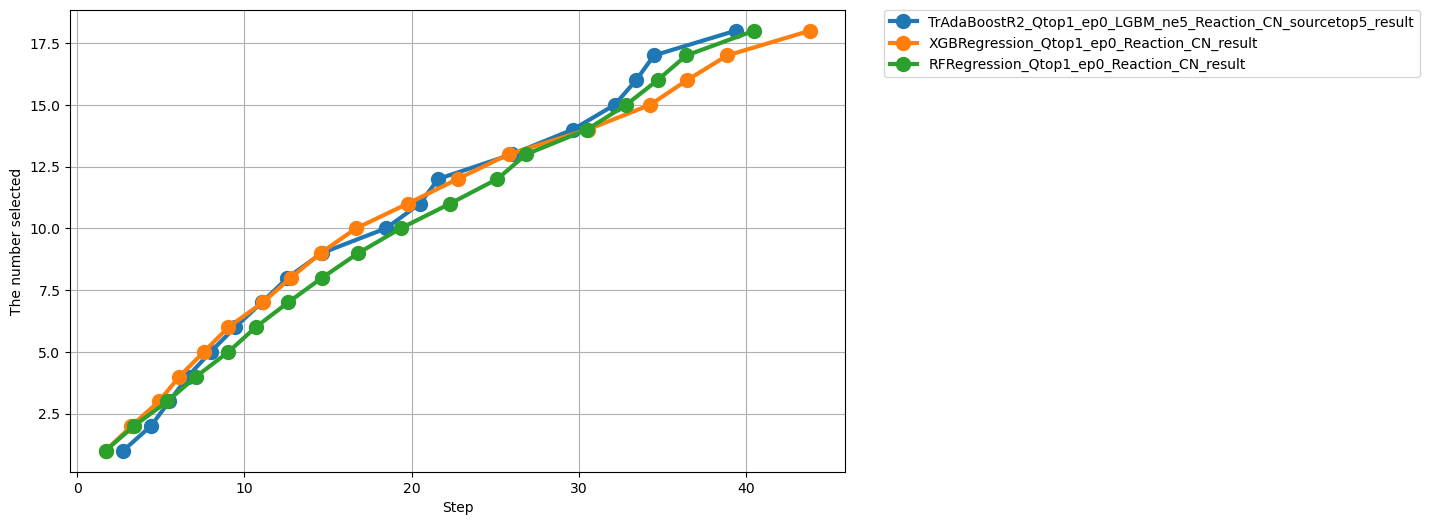

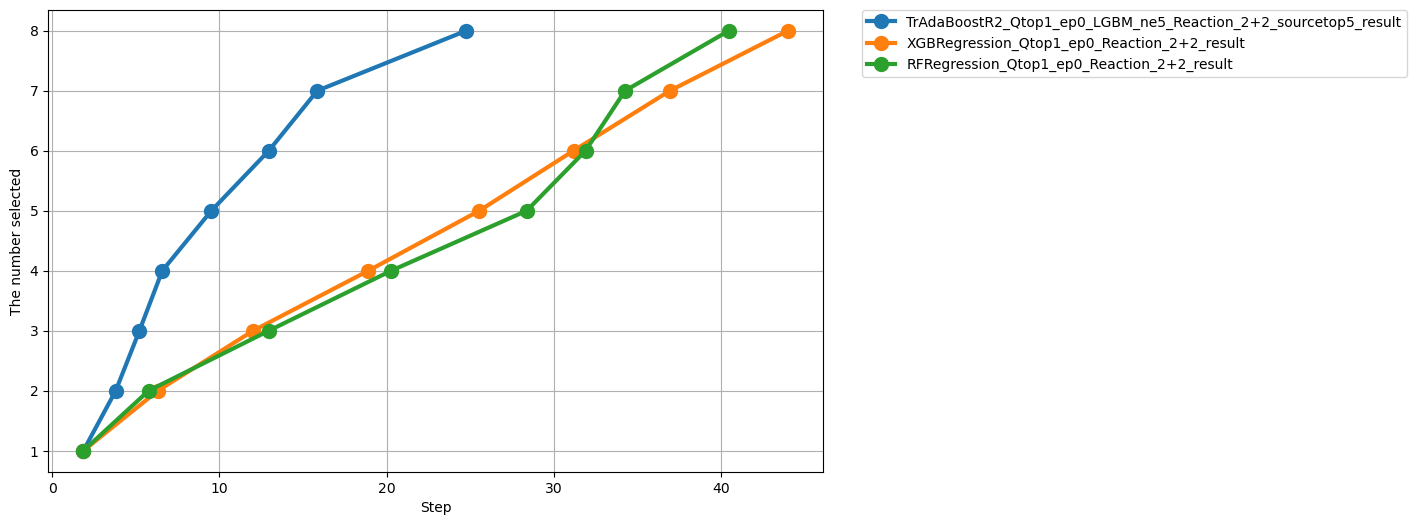

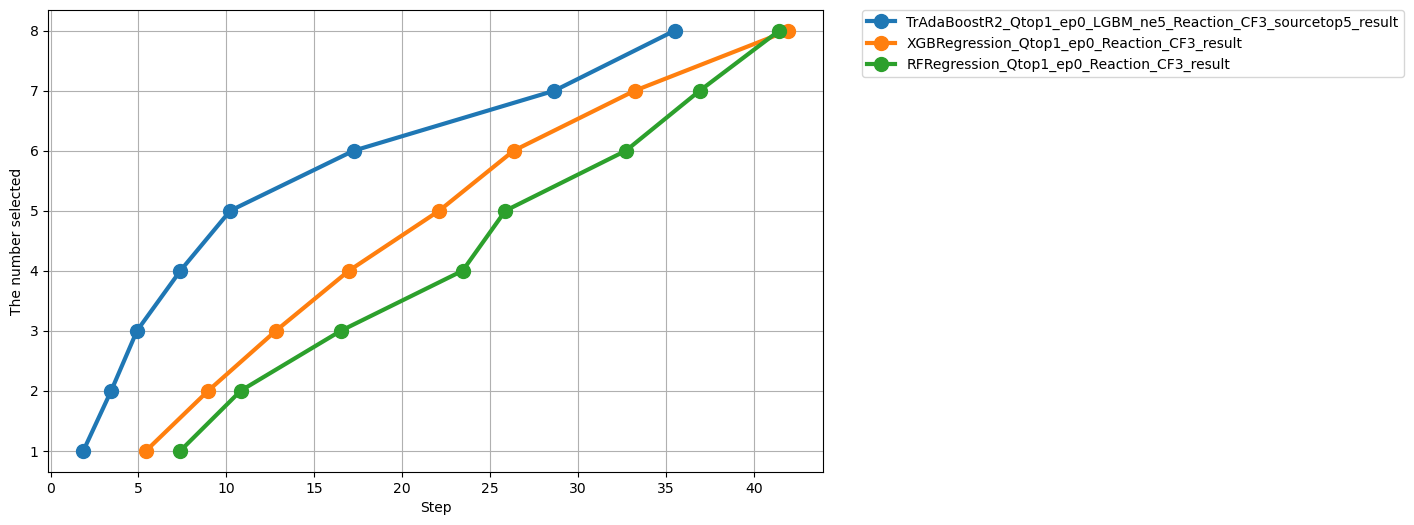

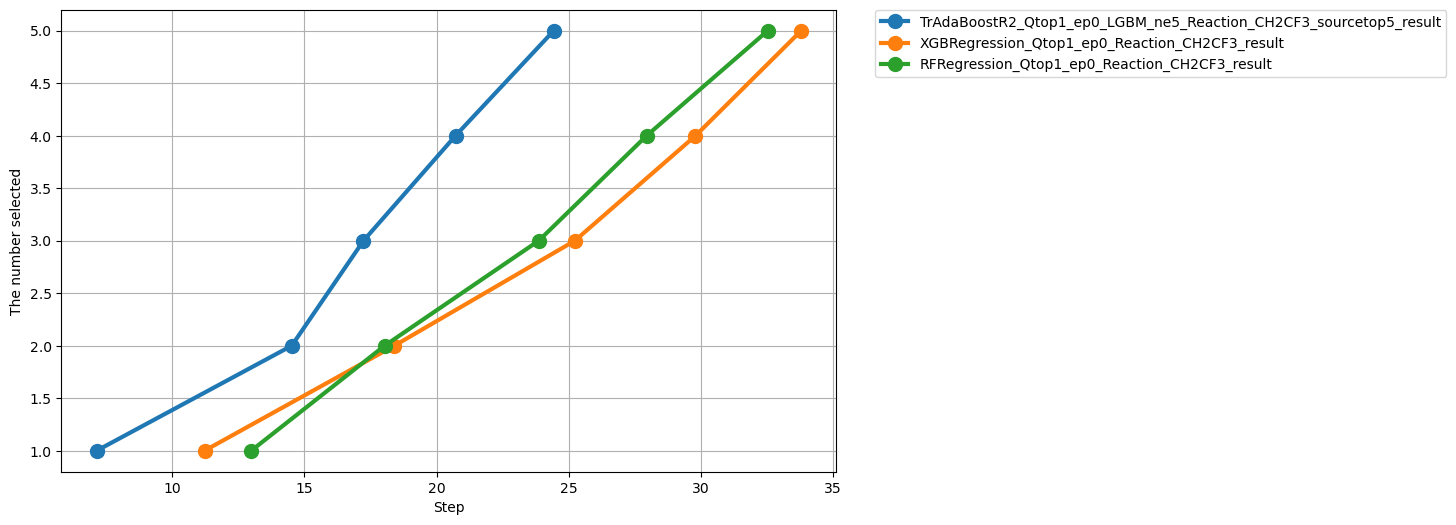

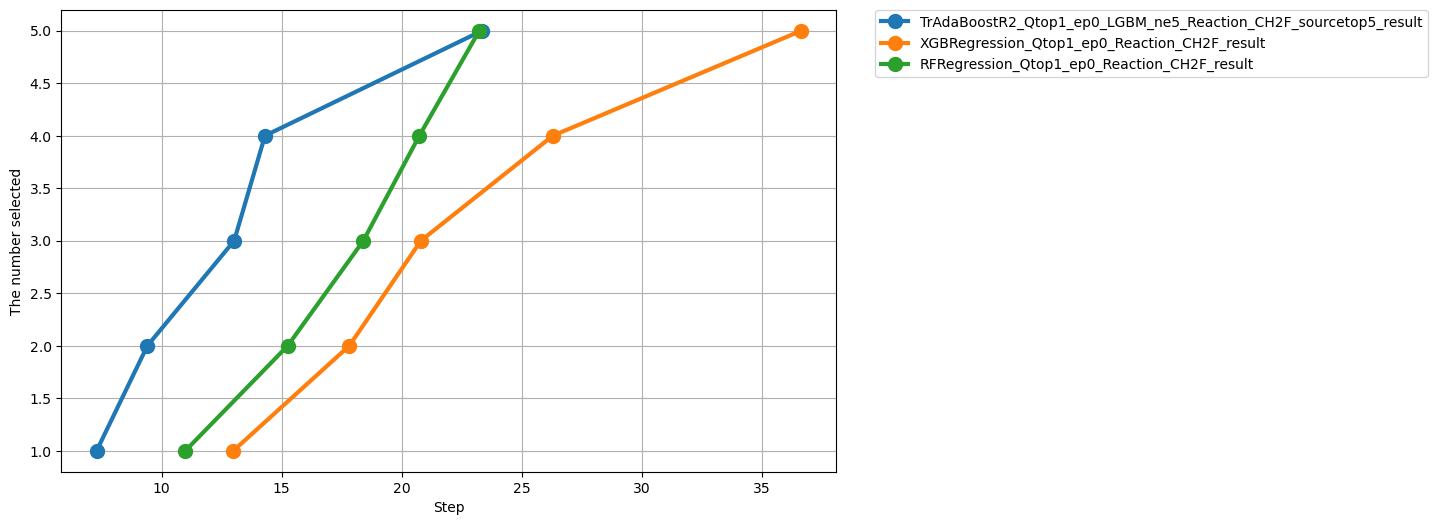

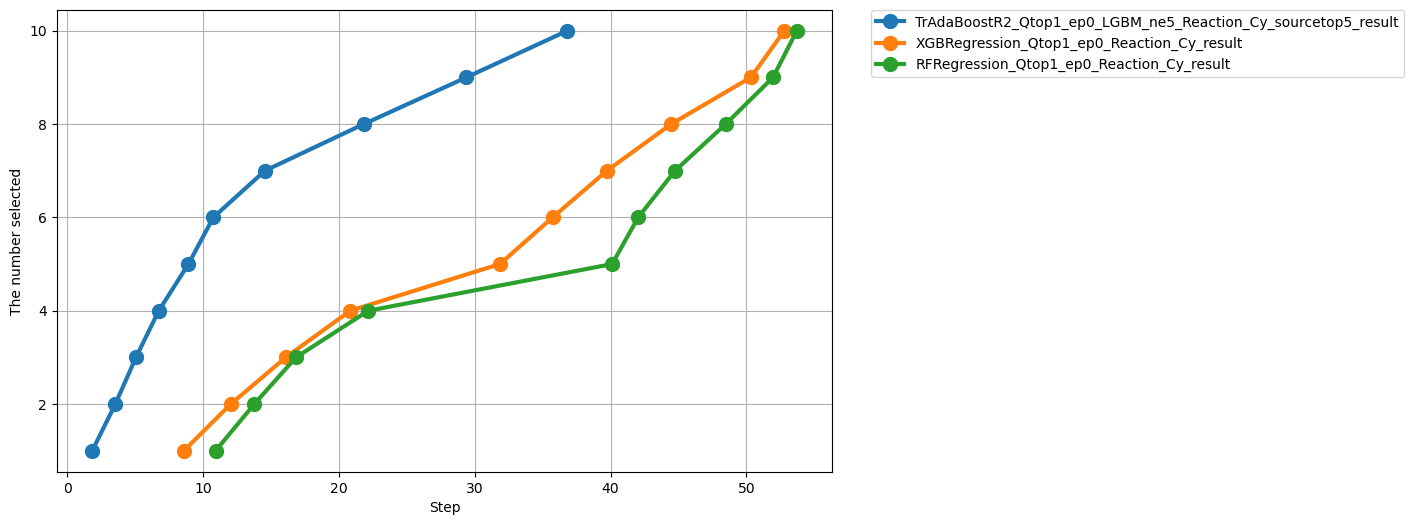

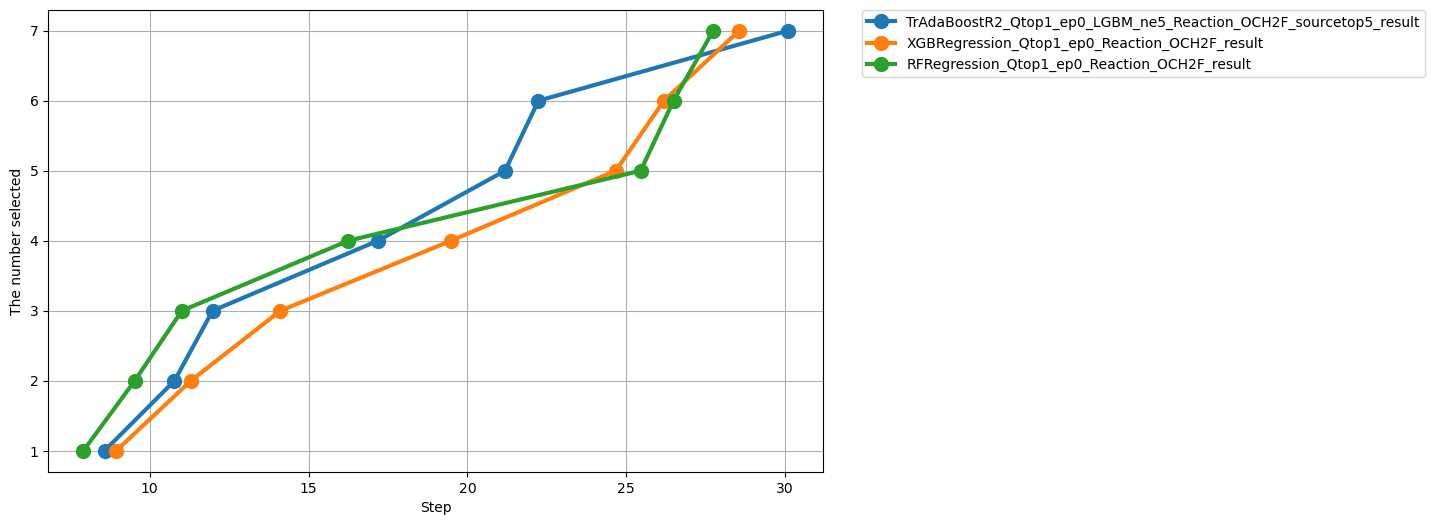

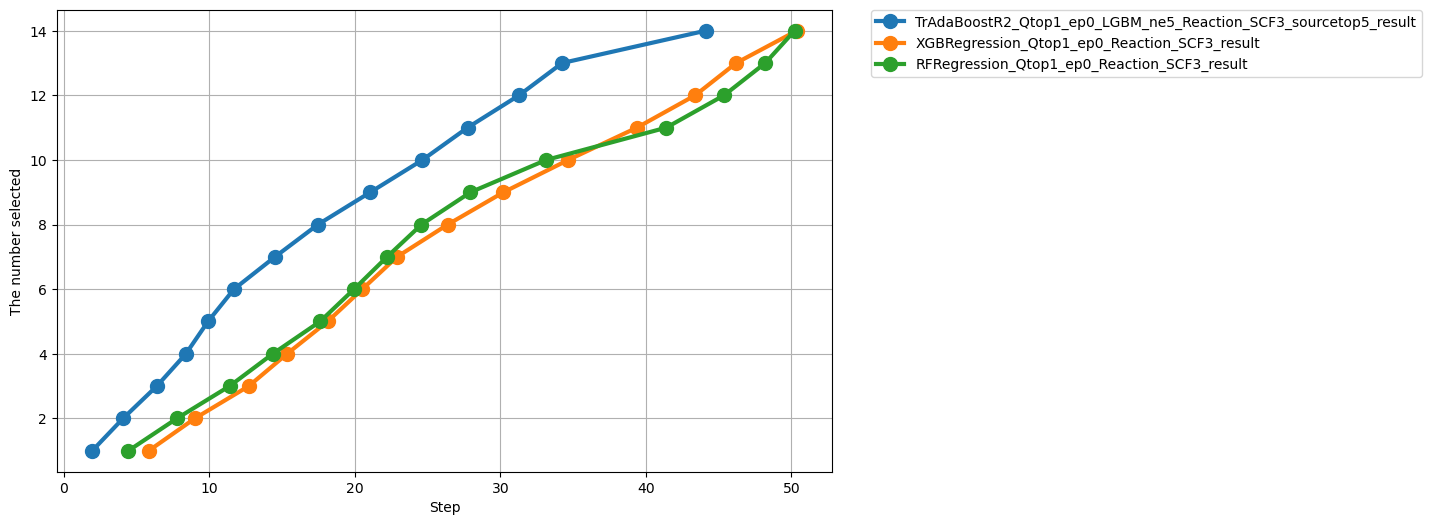

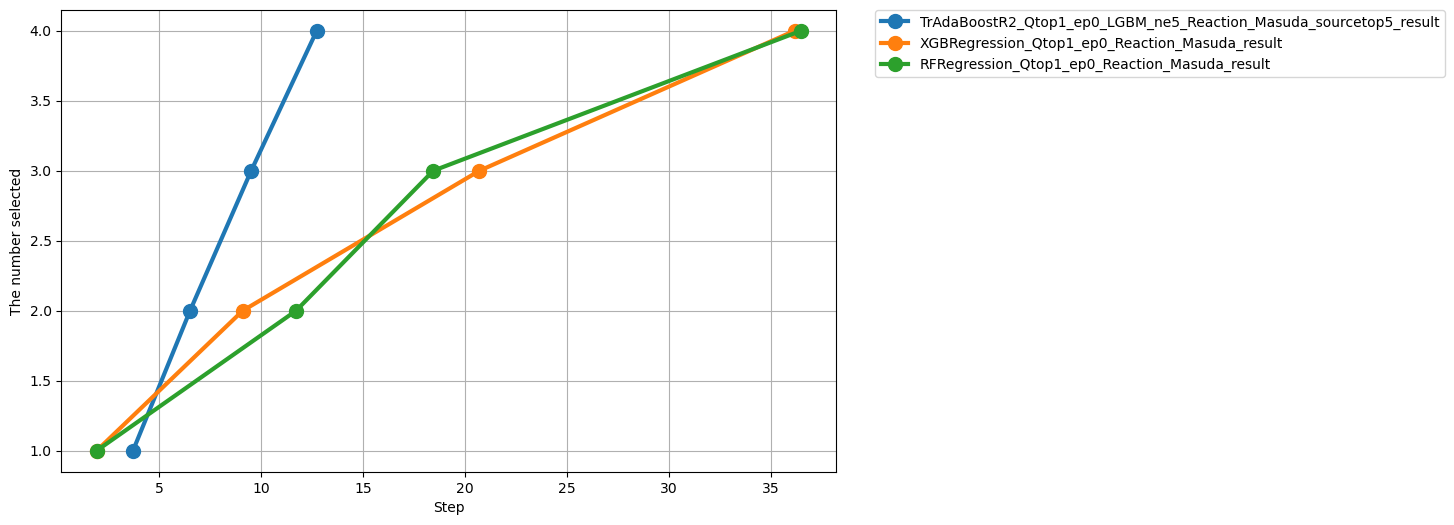

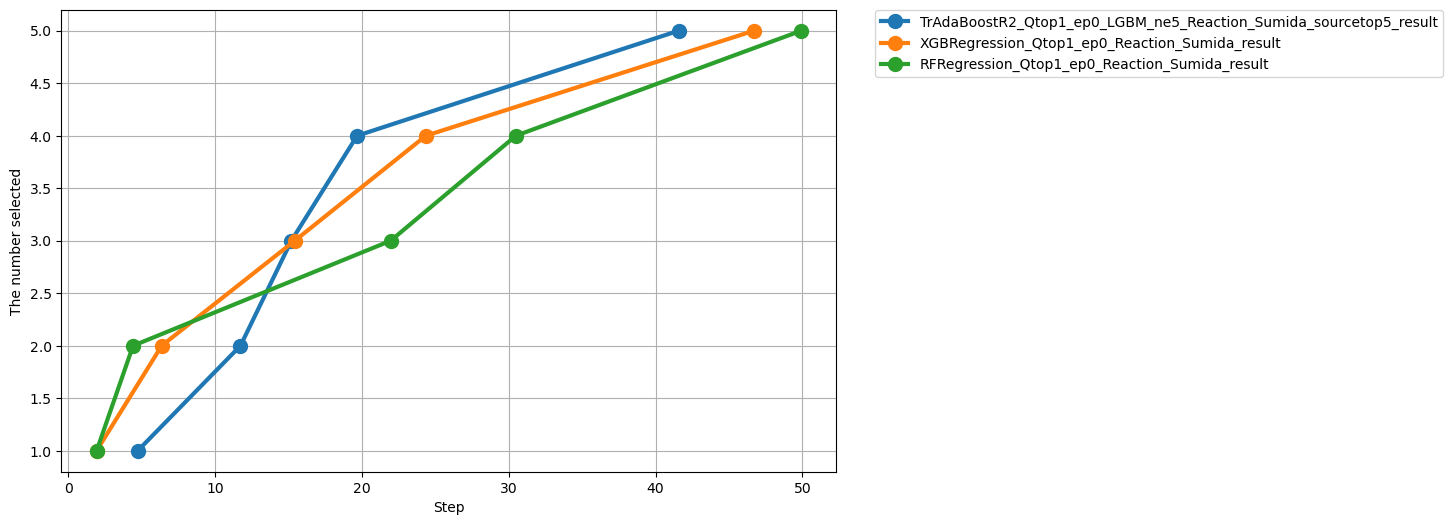

In [3]:
All_data_names = ['Reaction_CO_1.5h', 'Reaction_CO_7.5h', 'Reaction_CO_biphenyl', 'Reaction_CO_ortho', 
                  'Reaction_CO_Cl', 
                  'Reaction_CS', 
                  'Reaction_CN', 'Reaction_2+2', 'Reaction_CF3', 
                  'Reaction_CH2CF3',
                  'Reaction_CH2F', 'Reaction_Cy', 'Reaction_OCH2F', 'Reaction_SCF3',
                  'Reaction_Masuda', 'Reaction_Sumida'
                 ]

for target in All_data_names:
    # ファイル名指定
    save_file = f"{file}_{target}"
    
    # 入力リスト作成（_select_averages.csvを除いた名前）
    data_names = []
    for model in model_list:
        if model == "TrAdaBoost":
            for es, ne, k, selection_order, top_k, epsilon in product(
                es_list, ne_list, k_list, selection_order_list, top_k_list, epsilon_list
            ):
                data_names.append(f'TrAdaBoostR2_Qtop{top_k}_ep{epsilon}_{es}_ne{ne}_{target}_source{selection_order}{k}_result')
        elif model == "BayesianOptimization":
            for acquisition_type in acquisition_type_list:
                data_names.append(f'BayesianOptimization_{target}_GPyOpt_{acquisition_type}_RBF_result')
        else:
            data_names.append(f'{model}_Qtop{top_k}_ep{epsilon}_{target}_result')
                             
    # データを格納する辞書
    data_frames = {}
    
    plt.figure(figsize=(10, 6))
    
    # ファイルを読み込み
    for name in data_names:
        file_path = f"../results/{name}_select_averages.csv"  # 自動でファイル名を作成
        if os.path.exists(file_path):  # ファイルが存在する場合のみ読み込む
            data_frames[name] = pd.read_csv(file_path)
    
    # カラーマップの設定（異なる色を自動で割り当てる）
    colors = plt.cm.tab10(range(len(data_names)))  # Tab10カラーマップから色を取得
    
    # プロットの作成
    for i, (label, df) in enumerate(data_frames.items()):
        y_values = df.index + 1  # x軸の値をインデックスに1を加えたものに設定
        x_values = df[label]  # y軸の値として各データフレーム内の対応する列を指定
        plt.plot(x_values, y_values, marker='o',markersize=10, linewidth=3, color=colors[i], linestyle='-', label=label)
    
    # 凡例と表示
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.ylabel('The number selected')
    plt.xlabel('Step')
    plt.grid()
    
    # 画像ファイルとして保存
    file_name = f"../figures/{save_file}.png"  # 保存するファイル名
    #plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()